# Exploration of Car Make and Violation Description Data from The City of Los Angeles Parking Citation Open Dataset

Based on [previous explorations](https://github.com/hackforla/lucky-parking/tree/citation-analysis/notebooks/exploratory) of the Los Angeles Parking Citation Open Dataset, it was found that parking citation violation types varied greatly by car make. This exploration will repeat that analysis and look at picking the best features for a model for users to interact with.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from pathlib import Path

# Load project directory
PROJECT_DIR = Path(os.path.abspath('../..'))

In [130]:
# Load already cleaned data from makefile command
# 20% sampled from raw dataset
# Only make and violation_description columns
df = pd.read_csv(PROJECT_DIR / 'data/processed/2021-01-02_processed_02samp.csv', index_col=0)
df.head()

,make,violation_description
index,,
0,BMW,NO EVIDENCE OF REG
1,Nissan,NO EVIDENCE OF REG
2,Honda,NO PARKING
3,Nissan,NO EVIDENCE OF REG
4,Honda,NO EVIDENCE OF REG


In [12]:
df.isna().sum()/len(df)*100

make                     0.181596
violation_description    0.879804
dtype: float64

In [13]:
df.dropna(inplace=True)

In [14]:
df.violation_description.value_counts()[:15]/len(df)*100

NO PARK/STREET CLEAN      28.568181
METER EXP.                17.682307
RED ZONE                   8.167714
PREFERENTIAL PARKING       7.026174
DISPLAY OF TABS            5.806613
NO PARKING                 4.423717
DISPLAY OF PLATES          2.710146
WHITE ZONE                 2.119206
PARKED OVER TIME LIMIT     1.914453
NO STOP/STANDING           1.812977
STANDNG IN ALLEY           1.541908
BLOCKING DRIVEWAY          1.298122
PARKED OVER TIME LIM       1.233157
STOP/STAND PROHIBIT        1.069238
YELLOW ZONE                1.022956
Name: violation_description, dtype: float64

In [15]:
df.head()

,make,violation_description
index,,
0,BMW,NO EVIDENCE OF REG
1,Nissan,NO EVIDENCE OF REG
2,Honda,NO PARKING
3,Nissan,NO EVIDENCE OF REG
4,Honda,NO EVIDENCE OF REG


In [18]:
violations = df.violation_description.value_counts()[:15].index

In [72]:
df['violation_description'] = df.violation_description.replace(dict.fromkeys(other_vio_desc, 'OTHER'))

In [45]:
make_vio_dict = {}
for make in df.make.value_counts().head(40).index:
  counts = df.loc[(df.make == make), 'violation_description'].value_counts()
  count_ratio = counts/counts.sum()
  make_vio_dict[make] = count_ratio.to_dict()
make_ratio = pd.DataFrame.from_dict(make_vio_dict).T.fillna(0)

In [46]:
make_ratio.loc[['BMW', 'Ford'],:]

,NO PARK/STREET CLEAN,METER EXP.,PREFERENTIAL PARKING,RED ZONE,DISPLAY OF TABS,NO PARKING,WHITE ZONE,PARKED OVER TIME LIMIT,NO STOP/STANDING,BLOCKING DRIVEWAY,...,8009H,TRAILER 6' HIGH,8062,TM LMT EXCEEDED,80692A,WRG SD-DUAL RWY,26703A1,6644K2,5201D,8054H
BMW,0.239059,0.236339,0.083127,0.052838,0.061697,0.038057,0.021126,0.016215,0.013367,0.008731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ford,0.295095,0.148364,0.058872,0.084498,0.066092,0.044995,0.019453,0.019731,0.018757,0.012580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(make_ratio)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index = make_ratio.index)

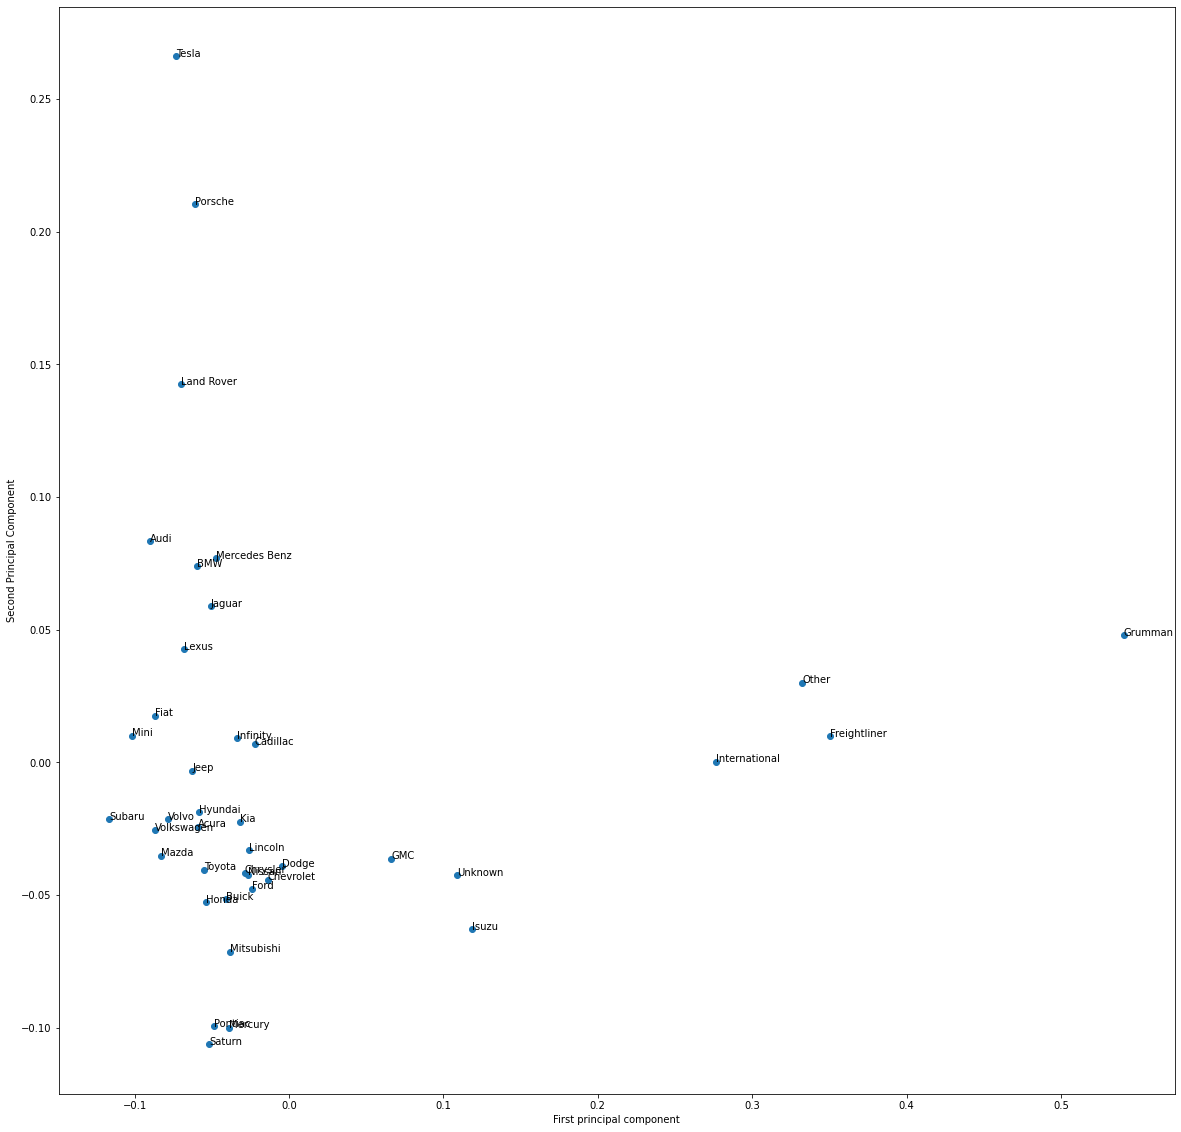

In [49]:
# PCA 2-component plot
plt.figure(figsize=(20,20))
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
for i, txt in enumerate(principalDf.index):
    plt.annotate(txt, (principalDf.iloc[i,0], principalDf.iloc[i,1]), fontsize=10 )
plt.show()

In [50]:
pca.explained_variance_ratio_

array([0.69740599, 0.21131849])

In [51]:
pca.explained_variance_ratio_.sum()

0.9087244761746143

In [63]:
PCA_components = pd.DataFrame(pca.components_, columns=make_ratio.columns, index=['PCA_1', 'PCA_2'])
PCA_components

,NO PARK/STREET CLEAN,METER EXP.,PREFERENTIAL PARKING,RED ZONE,DISPLAY OF TABS,NO PARKING,WHITE ZONE,PARKED OVER TIME LIMIT,NO STOP/STANDING,BLOCKING DRIVEWAY,...,8009H,TRAILER 6' HIGH,8062,TM LMT EXCEEDED,80692A,WRG SD-DUAL RWY,26703A1,6644K2,5201D,8054H
PCA_1,-0.527359,-0.354554,-0.174362,0.705881,-0.090909,0.039339,-0.014103,-0.018453,0.058164,-0.019389,...,0.000138,0.000173,0.000046,0.000046,0.000147,-0.000004,-0.000007,-0.000007,-0.000008,-0.000012
PCA_2,-0.579747,0.690550,0.096549,-0.019341,-0.125660,-0.065591,0.009107,-0.025945,-0.025845,-0.034166,...,0.000013,-0.000049,0.000004,0.000004,0.000004,-0.000015,-0.000047,-0.000047,-0.000052,0.000148


In [96]:
PCA_components.loc['PCA_2'].abs().sort_values(ascending=False).head(16)/sum(PCA_components.loc['PCA_2'].abs())*100

METER EXP.                27.858891
NO PARK/STREET CLEAN      23.388765
DISPLAY OF PLATES         15.391974
DISPLAY OF TABS            5.069525
PREFERENTIAL PARKING       3.895095
NO PARKING                 2.646128
EXCEED 72HRS-ST            2.038003
NO EVIDENCE OF REG         1.768497
STANDNG IN ALLEY           1.432223
BLOCKING DRIVEWAY          1.378368
PARKED OVER TIME LIM       1.270518
PARKED OVER TIME LIMIT     1.046689
NO STOP/STANDING           1.042660
FIRE HYDRANT               0.879632
NO STOP/STAND              0.827308
RED ZONE                   0.780261
Name: PCA_2, dtype: float64

In [95]:
sum(PCA_components.loc['PCA_2'].abs().sort_values(ascending=False).head(16)/sum(PCA_components.loc['PCA_2'].abs()))

0.9071453676049286